In [2]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features
from ta.utils import dropna
from backtesting import Backtest, Strategy
import backtesting
import seaborn as sns
import matplotlib.pyplot as plt
import random

Loading BokehJS ...

In [3]:
plt.style.use('seaborn-v0_8')
backtesting.set_bokeh_output(notebook=False)

In [4]:
data = pd.read_csv('GBPUSD_2020_to_2025_15min.CSV')
data['date'] = pd.to_datetime(data['date'])
data

,date,Open,Low,High,Close,Volume
0,2020-01-02 01:45:00,1.32187,1.32187,1.32214,1.32214,69
1,2020-01-02 02:00:00,1.32218,1.32161,1.32284,1.32251,4317
2,2020-01-02 02:15:00,1.32251,1.32148,1.32295,1.32205,2867
3,2020-01-02 02:30:00,1.32203,1.32097,1.32234,1.32212,5135
4,2020-01-02 02:45:00,1.32212,1.32171,1.32265,1.32197,2497
...,...,...,...,...,...,...
123597,2024-12-31 14:00:00,1.25099,1.25050,1.25194,1.25189,2727
123598,2024-12-31 14:15:00,1.25189,1.25142,1.25203,1.25159,2511
123599,2024-12-31 14:30:00,1.25159,1.25083,1.25159,1.25103,2927
123600,2024-12-31 14:45:00,1.25103,1.25059,1.25124,1.25092,2501


In [14]:
data_ta = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume')

In [27]:
data_ta = data_ta.drop(['trend_psar_up', 'trend_psar_down', 'trend_psar_up_indicator'], axis=1)

In [28]:
data_ta = data_ta.dropna(axis=0)
data_ta

,date,Open,Low,High,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
78,2020-01-02 21:15:00,1.31372,1.31365,1.31425,1.31401,2747,-1.951829e+04,-41117,-0.064781,-0.216327,...,-0.004975,-0.002837,-0.002138,-3.982025,-16.061355,12.079330,1.314889,0.022836,0.022833,-0.614912
79,2020-01-02 21:30:00,1.31401,1.31392,1.31436,1.31411,2454,-1.985293e+04,-38663,-0.061394,-0.150366,...,-0.006316,-0.003533,-0.002784,-1.487140,-13.146512,11.659372,1.314859,0.007610,0.007610,-0.607349
80,2020-01-02 21:45:00,1.31410,1.31226,1.31437,1.31280,4429,-2.201495e+04,-43092,-0.096800,-0.957741,...,-0.015247,-0.005876,-0.009372,7.548078,-9.007594,16.555672,1.314567,-0.099687,-0.099737,-0.706430
81,2020-01-02 22:00:00,1.31280,1.31271,1.31341,1.31328,2763,-2.027821e+04,-40329,-0.043196,-0.631458,...,-0.019158,-0.008532,-0.010626,8.258794,-5.554317,13.813110,1.314444,0.036563,0.036556,-0.670126
82,2020-01-02 22:15:00,1.31329,1.31270,1.31333,1.31295,3868,-2.107637e+04,-44197,-0.059493,-0.723598,...,-0.024008,-0.011627,-0.012380,12.109214,-2.021611,14.130824,1.314186,-0.025128,-0.025131,-0.695085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123597,2024-12-31 14:00:00,1.25099,1.25050,1.25194,1.25189,2727,9.244922e+06,1293047,-0.194532,-0.114411,...,-0.052724,-0.053970,0.001246,-6.757876,2.513734,-9.271610,1.252298,0.071943,0.071917,-5.313356
123598,2024-12-31 14:15:00,1.25189,1.25142,1.25203,1.25159,2511,9.243810e+06,1290536,-0.183249,-0.205681,...,-0.049072,-0.052991,0.003918,-9.113039,0.188379,-9.301418,1.252289,-0.023964,-0.023967,-5.336046
123599,2024-12-31 14:30:00,1.25159,1.25083,1.25159,1.25103,2927,9.242424e+06,1287609,-0.170397,-0.410458,...,-0.049221,-0.052237,0.003016,-10.070606,-1.863418,-8.207188,1.252269,-0.044743,-0.044753,-5.378402
123600,2024-12-31 14:45:00,1.25103,1.25059,1.25124,1.25092,2501,9.242462e+06,1285108,-0.145682,-0.391123,...,-0.049478,-0.051685,0.002207,-11.740874,-3.838909,-7.901965,1.252259,-0.008793,-0.008793,-5.386722


In [29]:
data_ta.columns

Index(['date', 'Open', 'Low', 'High', 'Close', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'tren

In [37]:
n = 500
rand_idx = random.randint(0, len(data_ta) - n)
data_sample = data_ta.iloc[rand_idx:rand_idx+n, :]
data_sample['date'] = pd.Series(data_sample['date']).apply(str)
data_sample

,date,Open,Low,High,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
47214,2021-12-16 23:15:00,1.33203,1.33187,1.33230,1.33216,766,1.750646e+06,622365,0.000205,-0.023357,...,0.001629,0.008295,-0.006667,-4.697125,-5.584686,0.887560,1.332319,0.015015,0.015014,0.757862
47215,2021-12-16 23:30:00,1.33217,1.33210,1.33256,1.33240,712,1.750863e+06,623077,0.012953,0.004391,...,0.002213,0.007079,-0.004866,-6.282488,-5.724246,-0.558242,1.332321,0.018016,0.018014,0.776015
47216,2021-12-16 23:45:00,1.33230,1.33220,1.33263,1.33262,700,1.751530e+06,623777,0.047707,0.025764,...,0.003963,0.006456,-0.002492,-7.629714,-6.105340,-1.524375,1.332323,0.016512,0.016510,0.792654
47217,2021-12-17 00:00:00,1.33253,1.33230,1.33270,1.33241,877,1.751136e+06,622900,-0.000676,-0.004227,...,0.004032,0.005971,-0.001939,-7.031953,-6.290662,-0.741291,1.332325,-0.015758,-0.015760,0.776771
47218,2021-12-17 00:15:00,1.33249,1.33240,1.33300,1.33298,1014,1.752082e+06,623914,0.043553,0.078946,...,0.007452,0.006267,0.001185,-5.253366,-6.083203,0.829837,1.332342,0.042780,0.042770,0.819883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47709,2021-12-24 03:15:00,1.34078,1.33896,1.34134,1.34095,2507,1.772540e+06,613947,-0.135613,0.142759,...,-0.000538,-0.012212,0.011673,5.249808,8.542372,-3.292565,1.339831,0.013425,0.013424,1.422694
47710,2021-12-24 03:30:00,1.34094,1.34060,1.34130,1.34091,2494,1.772255e+06,611453,-0.140338,0.108114,...,0.002976,-0.009174,0.012150,7.036087,8.241115,-1.205028,1.340002,-0.002983,-0.002983,1.419668
47711,2021-12-24 03:45:00,1.34085,1.33881,1.34100,1.34013,2605,1.772790e+06,608848,-0.101363,-0.197602,...,0.001053,-0.007129,0.008182,8.685608,8.330014,0.355594,1.340008,-0.058169,-0.058186,1.360673
47712,2021-12-24 04:00:00,1.34014,1.33941,1.34090,1.34060,641,1.773173e+06,609489,-0.094470,-0.126335,...,0.002332,-0.005237,0.007568,2.098290,7.083669,-4.985379,1.340024,0.035071,0.035065,1.396221


In [38]:
def format_xaxis(axs, data_sample):
    for ax in axs:
        ax.set_xticks([_ for i, _ in enumerate(data_sample['date']) if i % 10 == 0])
        ax.set_xticklabels([])
        ax.set_xlabel('')
        ax.legend()

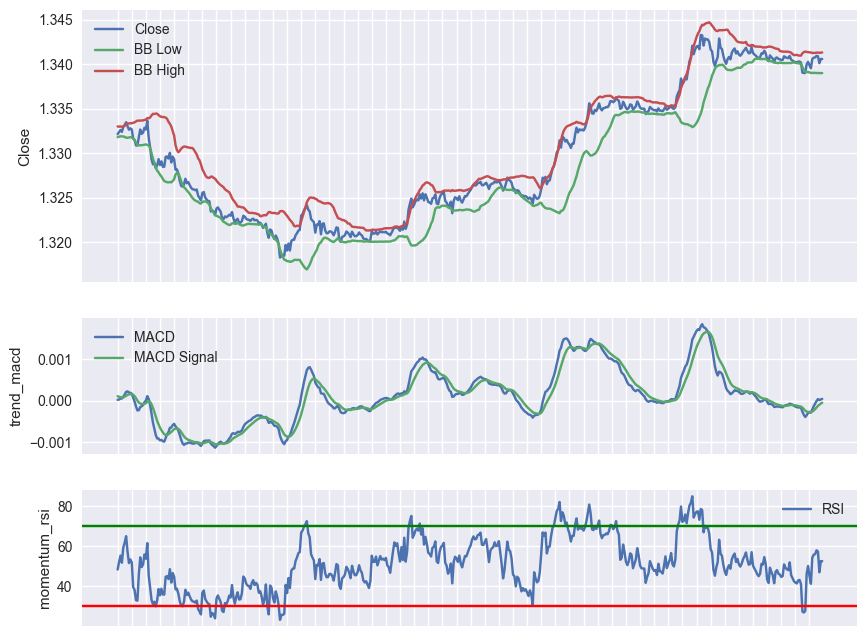

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1, 1]})
sns.lineplot(data_sample, x='date', y='Close', label='Close', ax=ax1)
sns.lineplot(data_sample, x='date', y='volatility_bbl', label='BB Low', ax=ax1)
sns.lineplot(data_sample, x='date', y='volatility_bbh', label='BB High', ax=ax1)

sns.lineplot(data_sample, x='date', y='trend_macd', label='MACD', ax=ax2)
sns.lineplot(data_sample, x='date', y='trend_macd_signal', label='MACD Signal', ax=ax2)

sns.lineplot(data_sample, x='date', y='momentum_rsi', label='RSI', ax=ax3)
ax3.axhline(y=30, color='r')
ax3.axhline(y=70, color='g')

format_xaxis([ax1, ax2, ax3], data_sample)

In [53]:
class TAStrat(Strategy):
    def init(self):
        ...

    def next(self):
        current_price = self.data.Close[-1]
        bollinger_lower = self.data.volatility_bbl[-1]
        bollinger_upper = self.data.volatility_bbh[-1]
        
        macd = self.data.trend_macd[-1]
        macd_signal = self.data.trend_macd_signal[-1]
        
        if all([
            current_price > bollinger_lower,
            any(current_price < np.array(self.data.volatility_bbl[-8:-1])),
            macd > macd_signal,
            any(macd < np.array(self.data.trend_macd_signal[-8:-1]))
        ]):
            self.buy(tp=current_price*1.01, sl=current_price*0.99)
        
        


In [54]:
bt = Backtest(data_ta, TAStrat, cash=10_000, commission=.00, exclusive_orders=True, hedging=False)
bt.run()

Start                                    78.0
End                                  123601.0
Duration                             123523.0
Exposure Time [%]                   30.729547
Equity Final [$]                  9912.837014
Equity Peak [$]                  11057.839762
Return [%]                           -0.87163
Buy & Hold Return [%]               -4.785352
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -13.271091
Avg. Drawdown [%]                   -0.364854
Max. Drawdown Duration                94994.0
Avg. Drawdown Duration             996.263636
# Trades                                166.0
Win Rate [%]                        37.349398
Best Trade [%]                       1.241162
Worst Trade [%]                     -1.014637
Avg. Trade [%]                    